In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA as sklearn_PCA
%matplotlib inline

In [65]:
class PCA:
    def __init__(self, n_components=None, whiten=False):
        self.n_components = n_components
        self.whiten = whiten
        
    def fit(self, X):
        m = X.shape[0]
        X_mean = np.mean(X, axis=0)
        X_stand = X - X_mean
        
        if self.whiten:
            X_stand = X_stand / X_stand.std(axis=0)
        
        cov_matrix = np.dot(X_stand.T, X_stand) / (m - 1)
        
        self.eig_values, self.eig_vectors = np.linalg.eig(cov_matrix)
        return self
    
    def transform(self, X):
        X = X - np.mean(X, axis=0)
        if self.whiten:
            X = X / X.std(axis=0)
        result = X @ self.eig_vectors
        return result

In [84]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
pca = PCA(whiten=True)
pca.fit(X)
X_prime = pca.transform(X)

Text(0.5, 0, 'PC1')

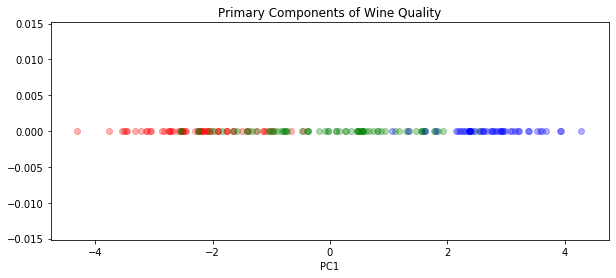

In [87]:
plt.figure(figsize=(10, 4))
for c in np.unique(wine.target):
    color = ['red', 'green', 'blue'][c]
    X_class = X_prime[wine.target == c]
    plt.scatter(X_class[:, 0], X_class[:, 1]*0, color=color, alpha=0.3)
plt.title("Primary Components of Wine Quality")
plt.xlabel("PC1")

In [89]:
X_class.shape

(48, 13)

In [30]:
X_org

array([[ 1.01142935,  1.63621562,  1.01906917, ...,  0.45775693,
        -0.26554631,  0.88617231],
       [ 0.96232659, -0.40842088,  2.2208657 , ...,  0.20520589,
        -0.39398113,  0.15007289],
       [ 1.39083294, -0.49769136, -0.36235942, ...,  1.22659716,
        -0.33615863, -0.39092948],
       ...,
       [ 0.28085213,  1.42945576, -0.72834189, ..., -1.15065676,
         0.66165857,  0.39939472],
       [ 0.29672119,  1.42142658, -0.58213003, ..., -0.15686654,
        -0.35883265,  1.46574783],
       [-0.59353987, -0.01624107, -1.83275798, ...,  0.82914115,
         0.2198916 ,  0.29740224]])

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
setos = df.values[:, :4].astype('float64')
model = PCA(whiten=True)
model.fit(setos)
model.transform(setos)

array([[-2.26454173e+00, -5.05703903e-01, -1.21943348e-01,
         2.30733235e-02],
       [-2.08642550e+00,  6.55404729e-01, -2.27250832e-01,
         1.03208244e-01],
       [-2.36795045e+00,  3.18477311e-01,  5.14796236e-02,
         2.78252250e-02],
       [-2.30419716e+00,  5.75367713e-01,  9.88604444e-02,
        -6.63114622e-02],
       [-2.38877749e+00, -6.74767397e-01,  2.14278490e-02,
        -3.73972870e-02],
       [-2.07053681e+00, -1.51854856e+00,  3.06842583e-02,
         4.39877494e-03],
       [-2.44571134e+00, -7.45626750e-02,  3.42197636e-01,
        -3.80965668e-02],
       [-2.23384186e+00, -2.47613932e-01, -8.25744645e-02,
        -2.55051623e-02],
       [-2.34195768e+00,  1.09514636e+00,  1.53562399e-01,
        -2.67938291e-02],
       [-2.18867576e+00,  4.48629048e-01, -2.46559522e-01,
        -3.99073035e-02],
       [-2.16348656e+00, -1.07059558e+00, -2.64009373e-01,
         1.53011377e-02],
       [-2.32737775e+00, -1.58587455e-01,  1.00165616e-01,
      

In [74]:
model = sklearn_PCA(whiten=True)
model.fit(setos)
model.transform(setos)

array([[-1.30590280e+00,  6.63589914e-01, -7.67673494e-02,
         6.53803515e-03],
       [-1.32107398e+00, -3.44499981e-01, -7.26288524e-01,
         6.47219065e-01],
       [-1.40593600e+00, -2.79054256e-01,  8.81776362e-02,
         1.25441407e-01],
       [-1.33617856e+00, -6.32132070e-01,  1.34436575e-01,
        -4.93559288e-01],
       [-1.32749711e+00,  6.78456858e-01,  3.43406236e-01,
        -4.10212098e-01],
       [-1.10920067e+00,  1.51932013e+00,  6.22100088e-01,
        -1.76400616e-01],
       [-1.37240118e+00, -1.66817223e-01,  9.43008976e-01,
        -3.25548628e-01],
       [-1.27781875e+00,  3.46223939e-01, -5.63894222e-02,
        -3.00740051e-01],
       [-1.40503061e+00, -1.15972851e+00,  9.75493944e-02,
        -1.72947634e-01],
       [-1.30086133e+00, -2.16772667e-01, -6.83507584e-01,
        -3.63180908e-01],
       [-1.21945893e+00,  1.32457995e+00, -2.47215419e-01,
        -1.07920814e-01],
       [-1.27132901e+00,  4.37249065e-02,  3.84162091e-01,
      